In [522]:
import numpy as np 
import pathlib 
import h5py
import os
import datetime 
import pandas as pd
import warnings
import scipy
import pathlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib_scalebar.scalebar import ScaleBar
import seaborn as sns
# import seaborn_image as isns
sns.set_theme()
sns.set_style("whitegrid")
import os 
import napari
import skimage.measure
import copy
import math
import natsort
import joblib
from joblib import Parallel, delayed

import space
import plotting
import temporal
import utilities
import filehandling
import utilities
import unit_conversion
import contouring
from utilities import multicolour_reshape as reshape 
import signal_analysis
import pickle
from collections.abc import Iterable
# qgrid.enable() 
# import pandasgui
# import tabloo

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

# %matplotlib widget
# plt.ioff()
# Lazy define some plotting params
chromatic_palette = ['red', 'green', 'blue', 'violet'] # R G B UV
rgbuv_palette = ['red', 'green', 'violet']
chromatic_hues = ["R", "G", "B", "UV"]

achromatic_palette = ['black', 'brown'] # BW BWnoUV 
achromatic_hues = ["BW", "BWnoUV"]
all_palette = chromatic_palette + achromatic_palette
all_hues = ["R", "G", "B", "UV", "BW", "BWnoUV"]
rguv_hues = ["R", "G", "UV"]
nanometers = ["588", "478", "422", "375"]
fish_palette = ["orange", "royalblue","blueviolet", "fuchsia"]

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="white", rc=custom_params)
sns.set_context("notebook")
matplotlib.rcParams['svg.fonttype'] = 'none'

%reload_ext autoreload
%autoreload 2

In [523]:
user = pathlib.Path(os.getcwd()).parts[2]
pkl_files = filehandling.find_files_in(".pkl", fr"C:\Users\{user}\OneDrive\Universitet\PhD\Pickles")
# pkl_files = filehandling.find_files_in(".pkl", r"D:\Pickles")
pkl_files
# user

[WindowsPath('C:/Users/SimenLab/OneDrive/Universitet/PhD/Pickles/2023-11-7_0_0_ColourSWN_200.pkl'),
 WindowsPath('C:/Users/SimenLab/OneDrive/Universitet/PhD/Pickles/2023-11-7_0_2_ColourSWN_200_1.pkl'),
 WindowsPath('C:/Users/SimenLab/OneDrive/Universitet/PhD/Pickles/2023-11-7_0_4_ColourSWN_200.pkl'),
 WindowsPath('C:/Users/SimenLab/OneDrive/Universitet/PhD/Pickles/2023-11-7_MP_0_3_ColourSWN_200_.pkl'),
 WindowsPath('C:/Users/SimenLab/OneDrive/Universitet/PhD/Pickles/2023-11-8_MP_0_0_ColourSWN_200_.pkl'),
 WindowsPath('C:/Users/SimenLab/OneDrive/Universitet/PhD/Pickles/2023-6-13_0_0_ColourSWN_200_0.pkl'),
 WindowsPath('C:/Users/SimenLab/OneDrive/Universitet/PhD/Pickles/2023-6-13_0_1_ColourSWN_200_0.pkl'),
 WindowsPath("C:/Users/SimenLab/OneDrive/Universitet/PhD/Pickles/2023-6-14_'0_2_ColourSWN_200_0'.pkl"),
 WindowsPath('C:/Users/SimenLab/OneDrive/Universitet/PhD/Pickles/2023-6-14_SMP_0_2_ColourSWN_200_0.pkl'),
 WindowsPath("C:/Users/SimenLab/OneDrive/Universitet/PhD/Pickles/2023-7-18_'

In [3]:
loadfile = filehandling.load(pkl_files[7])

In [27]:
test = np.array([utilities.multicolour_reshape(loadfile.polarities(), 4).T.tolist(), np.array(loadfile.polarity_category())], dtype = "object")
pols_tuning = utilities.multicolour_reshape(loadfile.polarities(), loadfile.numcolour)

In [37]:
test[:, -5]

array([list([nan, nan, 1.0, 1.0]), 'on'], dtype=object)

In [29]:
# Create empty array of appropriate length 
output = np.zeros(len(arr))
# Find indices where arr has -1 along axis 1
output[np.sum(np.isnan(arr), axis = 1) >= 1] = np.nan
output[np.where(np.all(arr == -1, axis=1))] = 1
output[np.where(np.all(arr == 1, axis=1))] = -1
output[np.where(np.any(arr == 1, axis=1) * np.any(arr == -1, axis=1))] = 2
output

array([nan,  1.,  0., nan, nan,  2., nan,  2., nan, nan,  2., nan, nan,
        2.,  2.,  2.,  2., nan, -1., nan, nan, nan, -1., -1., nan, nan,
       nan, nan, nan,  2.,  2.])

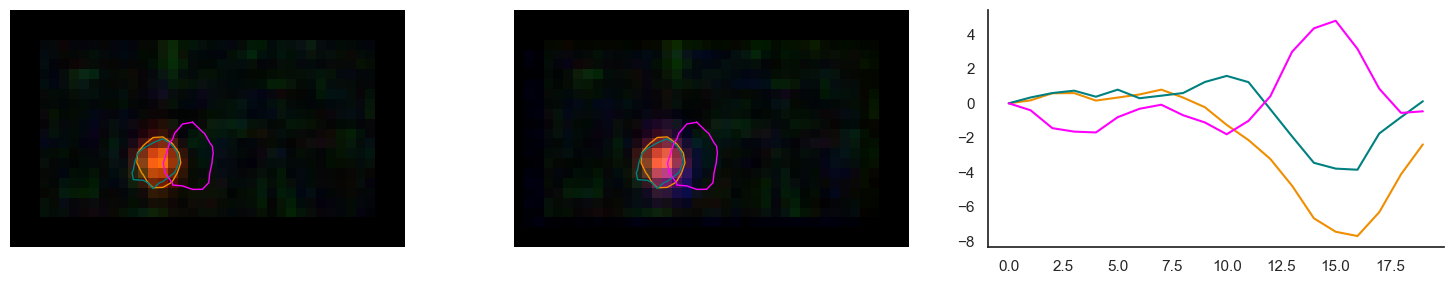

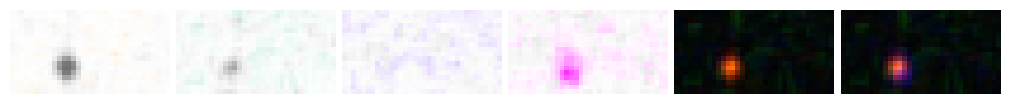

In [275]:
roi = 10
plotting.visualise_summary(loadfile, roi)
plotting.chroma_overview(loadfile, roi);

Have changed paramteres within polarity_neat inside filehandling.py to force polarity depending on which "side" of the tuple a signal is detected, regardless of whether that signals has a postiive polarity or negative polarity. Not sure yet if this is a good solution and requires manually going through examples. Additionally, noted that object.polarity_category() assigns 'off' when everything is nans, so need to look into that.

All in all, should think about whether the underlying polarity "engine" ise the way to go about this, as there is quite a lot of bugs and exceptions here. 


In [524]:
roi_df, rec_df, chroma_df = filehandling.compile_chroma_strf_df(pkl_files, do_bootstrap = True) #, store_objects="D:\Pickles")
# roi_df, rec_df, chroma_df = filehandling.compile_chroma_strf_df(files, do_bootstrap = True, store_objects="D:\Pickles")
# Clearly, IPL_depths nan-ing is borked so you MUST have it otherwise the DFs are not the same size. Not bad, but a bit confusing
#rec_df.to_pickle(r"D:\DataFrames\rec_df.pkl")
#chroma_df.to_pickle(r"D:\DataFrames\chroma_df.pkl")

Current file: C:\Users\SimenLab\OneDrive\Universitet\PhD\Pickles\2023-11-7_0_0_ColourSWN_200.pkl
Current file: C:\Users\SimenLab\OneDrive\Universitet\PhD\Pickles\2023-11-7_0_2_ColourSWN_200_1.pkl
Current file: C:\Users\SimenLab\OneDrive\Universitet\PhD\Pickles\2023-11-7_0_4_ColourSWN_200.pkl
Current file: C:\Users\SimenLab\OneDrive\Universitet\PhD\Pickles\2023-11-7_MP_0_3_ColourSWN_200_.pkl
Current file: C:\Users\SimenLab\OneDrive\Universitet\PhD\Pickles\2023-11-8_MP_0_0_ColourSWN_200_.pkl
Current file: C:\Users\SimenLab\OneDrive\Universitet\PhD\Pickles\2023-6-13_0_0_ColourSWN_200_0.pkl
Current file: C:\Users\SimenLab\OneDrive\Universitet\PhD\Pickles\2023-6-13_0_1_ColourSWN_200_0.pkl
Current file: C:\Users\SimenLab\OneDrive\Universitet\PhD\Pickles\2023-6-14_'0_2_ColourSWN_200_0'.pkl
Current file: C:\Users\SimenLab\OneDrive\Universitet\PhD\Pickles\2023-6-14_SMP_0_2_ColourSWN_200_0.pkl
Current file: C:\Users\SimenLab\OneDrive\Universitet\PhD\Pickles\2023-7-18_'0_1_ColourSWN_200_0'.pkl
Cu

In [4]:
chroma_df

,date,path,filename,curr_path,strf_keys,cell_id,size,ipl_depths,opp_bool,ampl_375,...,peakneg_478,peakneg_588,peakpos_375,peakpos_422,peakpos_478,peakpos_588,pol_375,pol_422,pol_478,pol_588
0,2023-11-07,D:\Igor analyses\231107 rfs here\2023-11-7_0_0...,2023-11-7_0_0_ColourSWN_200.h5,C:\Users\Simen\OneDrive\Universitet\PhD\Pickle...,STRF0_0,11-07-2023_STRF0_0,200,88.0,True,0.0,...,0.000,1.105,0.0,0.00,0.00,0.000,0.0,-1.0,0.0,-1.0
1,2023-11-07,D:\Igor analyses\231107 rfs here\2023-11-7_0_0...,2023-11-7_0_0_ColourSWN_200.h5,C:\Users\Simen\OneDrive\Universitet\PhD\Pickle...,STRF0_1,11-07-2023_STRF0_1,200,70.0,False,0.0,...,0.000,0.000,0.0,0.00,0.00,0.000,0.0,0.0,0.0,0.0
2,2023-11-07,D:\Igor analyses\231107 rfs here\2023-11-7_0_0...,2023-11-7_0_0_ColourSWN_200.h5,C:\Users\Simen\OneDrive\Universitet\PhD\Pickle...,STRF0_2,11-07-2023_STRF0_2,200,52.0,False,0.0,...,0.000,0.000,0.0,0.00,0.00,0.000,0.0,0.0,0.0,0.0
3,2023-11-07,D:\Igor analyses\231107 rfs here\2023-11-7_0_0...,2023-11-7_0_0_ColourSWN_200.h5,C:\Users\Simen\OneDrive\Universitet\PhD\Pickle...,STRF0_3,11-07-2023_STRF0_3,200,90.0,True,0.0,...,0.000,1.105,0.0,0.00,0.00,0.000,0.0,0.0,0.0,-1.0
4,2023-11-07,D:\Igor analyses\231107 rfs here\2023-11-7_0_0...,2023-11-7_0_0_ColourSWN_200.h5,C:\Users\Simen\OneDrive\Universitet\PhD\Pickle...,STRF0_4,11-07-2023_STRF0_4,200,26.0,True,0.0,...,0.000,0.000,0.0,1.17,1.04,1.040,0.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,2023-08-02,D:\Igor analyses\230802\0_1_ColourSWN_1H\2023-...,2023-8-2_'0_1_ColourSWN_200_1H'.h5,C:\Users\Simen\OneDrive\Universitet\PhD\Pickle...,STRF0_20,08-02-2023_STRF0_20,200,83.0,True,0.0,...,0.975,0.000,0.0,0.00,0.00,0.000,0.0,-1.0,-1.0,0.0
477,2023-08-02,D:\Igor analyses\230802\0_1_ColourSWN_1H\2023-...,2023-8-2_'0_1_ColourSWN_200_1H'.h5,C:\Users\Simen\OneDrive\Universitet\PhD\Pickle...,STRF0_21,08-02-2023_STRF0_21,200,61.0,True,0.0,...,0.000,0.000,0.0,0.00,0.00,0.975,0.0,0.0,0.0,1.0
478,2023-08-02,D:\Igor analyses\230802\0_1_ColourSWN_1H\2023-...,2023-8-2_'0_1_ColourSWN_200_1H'.h5,C:\Users\Simen\OneDrive\Universitet\PhD\Pickle...,STRF0_22,08-02-2023_STRF0_22,200,84.0,False,0.0,...,0.000,0.000,0.0,0.00,0.00,0.000,0.0,0.0,0.0,0.0
479,2023-08-02,D:\Igor analyses\230802\0_1_ColourSWN_1H\2023-...,2023-8-2_'0_1_ColourSWN_200_1H'.h5,C:\Users\Simen\OneDrive\Universitet\PhD\Pickle...,STRF0_23,08-02-2023_STRF0_23,200,34.0,True,0.0,...,0.780,0.000,0.0,0.00,1.17,0.000,0.0,0.0,2.0,0.0


# Clustering 

In [525]:
from sklearn.cluster import KMeans, OPTICS, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.decomposition import PCA
# Import the sklearn function
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler
import clustering

## Kills metadata
def cols_like(list, df):
    final_list = []
    for term in list:
        curr_list = [i for i in df.columns if term in i]
        final_list.extend(curr_list)
    return final_list

def remove_nondata(input_df, to_drop = ['date', 'path', 'filename', 'curr_path', 'strf_keys', 'cell_id', 'size']):
    input_df = input_df.copy()
    actual_drop = [i for i in to_drop if i in input_df.columns]
    input_df = input_df.loc[(input_df!=0).any(axis=1)].drop(actual_drop, axis = 1)
    return input_df

def remove_nonnumeric(input_df, numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']):
    input_df = input_df.copy()
    input_df = input_df.select_dtypes(include=numerics)
    return input_df

def remove_missing_vals(input_df, ignore_cols = ["ipl_depths"], numerical_only = True, return_numerical_only = False):
    # Prevent overwriting 
    input_df = input_df.copy()
    # Numerical or not 
    if numerical_only == True:
        purge_df_numerical = remove_nonnumeric(input_df)
    # say which columns to ignore
    if ignore_cols != None:
        purge_df = purge_df_numerical.drop([i for i in ignore_cols if i in input_df.columns], axis = 1) # the list comprehension
        #just makes sure that if columns are not present the script does not error out:) 
    else:
        purge_df = input_df.copy()
    col = list(purge_df.columns)[:8]
    drop_list = purge_df.index[purge_df[col].eq(0).all(axis=1)].to_list()
    if return_numerical_only == True:
        non_empty_df = purge_df.drop(drop_list, axis = 0)
        # Remember to add back in the ignored columns so we get ones that were numerical
        non_cleaned_input_drop = input_df.drop(drop_list, axis = 0)
        # For each location
        order = list(purge_df.columns)
        for ignored_col, i in zip(ignore_cols, [purge_df_numerical.columns.get_loc(i) for i in ["ipl_depths"]]):
            order.insert(i, ignored_col)
        for fetch_col in order:
            non_empty_df[fetch_col] = non_cleaned_input_drop[fetch_col]
        non_empty_df = non_empty_df[order]
    else:
        non_empty_df = input_df.drop(drop_list, axis = 0)
    return non_empty_df

def prep_input_df(input_df, select_cols = None, scaler = StandardScaler(), nan_replace = 0, remove_missing = True, ignore_scale = None):
    # Can specify columns, otherwise use everything available
    if select_cols == None:
        select_cols = list(input_df.columns)
    # Prevent overwriting 
    input_df = input_df.copy()
    # Drop irrelevant cols (lazy by searching any match, meaning more
    # specific search criteria will yield less data)
    input_df = input_df[cols_like(select_cols, load_df)]
    # Remove missing values (but crucially keep index the same)
    if remove_missing == True: # need a better way of automatiing the below
        input_df = remove_missing_vals(input_df)
    # Kill nans 
    input_df = input_df.fillna(nan_replace)
    # Can scale, otherwise just return the cleaned DF
    if scaler != None:
        # If specified, ignore these columns in the scaling process
        if ignore_scale != None:
            if isinstance(ignore_scale, Iterable) is False:
                raise AttributeError("param 'ignore_scale' must be iterable")
            # Determine which are actually present 
            ignore_scale = [i for i in ignore_scale if i in input_df.columns]
            # Extract temporarily the parts of DF that are to be ignored (for inserting later)
            temp_extract_cols = input_df[ignore_scale].reset_index(drop = True)
            # For user-friendliness lets keep track of the indeces and insert them back in their original order
            ignored_indeces = [input_df.columns.get_loc(c) for c in ignore_scale if c in input_df]
            input_df = input_df.drop(ignore_scale, axis = 1)
        try:
            input_df = pd.DataFrame(scaler.fit_transform(input_df), columns = input_df.columns)
        except TypeError:
            numerics = ['int', 'float', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
            input_df = input_df.select_dtypes(include=numerics)
            input_df = pd.DataFrame(scaler.fit_transform(input_df), columns = input_df.columns)
        if ignore_scale != None: # add ignored cols back in their original order:)
            for column_index, column_name in zip(ignored_indeces, ignore_scale):
                input_df.insert(column_index, column_name, temp_extract_cols[column_name].values)# = temp_extract_cols
    return input_df

def elbow_plot(df, max_it = 50):
    # Assuming df is your DataFrame
    # Specify the range of k values you want to try
    k_values = range(1, max_it)
    # Initialize an empty list to store the sum of squared distances (inertia) for each k
    inertia = []
    # Perform k-means clustering for each k value
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init = "auto")
        kmeans.fit(df)
        inertia.append(kmeans.inertia_)
    # Create an elbow plot using Seaborn
    sns.set(style="whitegrid")
    plt.figure(figsize=(5, 4))
    sns.lineplot(x=k_values, y=inertia, marker='o')
    plt.title('Elbow Plot for K-Means Clustering')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Sum of Squared Distances (Inertia)')
    plt.show()

def df_kmeans(input_df, n_clusters = 15, random_state=0, n_init="auto", apply_cluster_id = True):
    input_df = input_df.copy()
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init=n_init)
    kmeans.fit(input_df)
    clusters = kmeans.predict(input_df)
    output_df = pd.DataFrame(input_df, index=input_df.index, columns=input_df.columns)
    output_df["cluster_id"] = clusters
    # output_df["curr_path"] = load_df["curr_path"]
    # if apply_cluster_id == True:
    #     input_df["cluster_id"] = clusters
    return output_df

def df_BayesGMM(input_df, n_components=30, random_state=0, max_iter = 1000, covariance_type="full", apply_cluster_id = True):
    input_df = input_df.copy()
    gm = BayesianGaussianMixture(n_components=n_components, random_state=random_state, 
        max_iter = max_iter, covariance_type=covariance_type).fit(input_df)
    clusters = gm.predict(input_df)
    # output_df["cluster_id"] = clusters
    output_df = pd.DataFrame(input_df, index=input_df.index, columns=input_df.columns)
    output_df["cluster_id"] = clusters
    # if apply_cluster_id == True:
    #     input_df["cluster_id"] = clusters
    return output_df

def df_GMM(input_df, n_components="auto", random_state=0, max_iter = 1000, covariance_type="full", apply_cluster_id = True):
    input_df = input_df.copy()
    if n_components == "auto":
        n_components = range(1, 9)
        covariance_type = ['spherical', 'tied', 'diag', 'full']
        score=[]
        for cov in covariance_type:
            for n_comp in n_components:
                gmm=GaussianMixture(n_components=n_comp,covariance_type=cov)
                gmm.fit(input_df)
                score.append((cov,n_comp ,gmm.aic(input_df)))
        score = np.array(score)
        max_index_vals = score[np.where(score[:, 2].astype("float") == np.min(score[:, 2].astype("float")))][0]
        # print(max_index_vals)
        covariance_type = max_index_vals[0]
        n_components = max_index_vals[1].astype("int")
        smallest_bic = max_index_vals[2]
        print("Automatic number determined as AIC =",smallest_bic, "landing on ", covariance_type, "with ", n_components, "n_components")
    gm = GaussianMixture(n_components=n_components, random_state=random_state, 
        max_iter = max_iter, covariance_type="full").fit(input_df)
    clusters = gm.predict(input_df)
    # output_df["cluster_id"] = clusters
    output_df = pd.DataFrame(input_df, index=input_df.index, columns=input_df.columns)
    output_df["cluster_id"] = clusters
    # if apply_cluster_id == True:
    #     input_df["cluster_id"] = clusters
    return output_df

def df_AggHierarchy(input_df, n_components=None, dist_thresh = 12.5, apply_cluster_id = True):
    input_df = input_df.copy()
    # print("distnaces:", distances_)s
    ag_model = AgglomerativeClustering(n_clusters = None, distance_threshold=dist_thresh, compute_distances = True).fit(input_df)
    print(np.sum(ag_model.distances_))
    input_df["cluster_id"] = ag_model.labels_
    # if apply_cluster_id == True:
    #     input_df["cluster_id"] = clusters
    return input_df    

def apply_clusters(input_df, cluster_id_df, inplace = False):
    if cluster_id_df.shape[0] != input_df.shape[0]:
        raise AttributeError("Index mismatch")
    if "cluster_id" not in list(cluster_id_df.columns):
        raise AttributeError("Column ['cluster_id'] missing from clutser_id_df")
    if inplace == False:
        input_df = input_df.copy()
        input_df["cluster_id"] = cluster_id_df["cluster_id"].values
        return input_df
    else:
        input_df["cluster_id"] = cluster_id_df["cluster_id"].values

def df_pca(input_df, n_comps = "auto", whiten = True):
    if n_comps == "auto":
        n_comps = input_df.shape[-1]
    pca = PCA(n_components=n_comps, whiten = whiten)
    pca.fit(input_df)
    reduced = pca.transform(input_df)
    # print(df_pca(pruned_df).to_numpy() == reduced)
    return pca, pd.DataFrame(reduced, index = input_df.index, columns = [f"PC{i}" for i in range(len(pca.explained_variance_))])

def get_cluster_cols(cluster_id, col_str_list, df):
    search_cols = cols_like(col_str_list, df) + ["cluster"]
    df_query = df[search_cols].query(f"cluster == {cluster_id}")
    return df_query.drop("cluster", axis = 1)

# def plot_df_stats(describe_df, print_stat = False):
#     means =  describe_df.loc["mean"]
#     errors = describe_df.loc["std"]
#     if print_stat == True:
#         print(results)
#     plt.plot(means)   |
#     plt.title("Mean ± STD by paramter")
#     plt.fill_between(range(len(errors)), means - errors, means + errors, alpha = 0.25)
#     plt.axhline(0)

def plot_df_tuning(post_cluster_df, clusters = 0, plot_cols = "all", specify_cluster = None, print_stat = False, ax = None):
    if "cluster" not in post_cluster_df.columns:
        raise AttributeError("Please ensure 'cluster_id' columns exists in input DF.")
    if plot_cols == "all":
        # This goes through the DataFrames and identifies which columns are present and extracts them 
        # independent of wavelength (more on parsing that below) 
        unique_cols_sans_wavelength = np.unique([i.split("_")[0] for i in post_cluster_df.columns if i != "cluster"])
        check_cols = np.unique([i.split("_")[0] for i in post_cluster_df.columns if i != "cluster"])
        if "ipl" in unique_cols_sans_wavelength:
            unique_cols_sans_wavelength = unique_cols_sans_wavelength.astype(object)
            unique_cols_sans_wavelength[np.where(unique_cols_sans_wavelength == "ipl")] = "ipl_depths"
        #assert np.all(check_cols == unique_cols_sans_wavelength)
        num_stats = len(unique_cols_sans_wavelength)
    else:
        raise ImportError("jokes on you")
    if np.all(ax == None):
        fig, ax = plt.subplots(1, num_stats, figsize=np.array([num_stats, .75])*4)
        fig.tight_layout()
        if num_stats == 1:
            ax = [ax]
    if type(clusters) == int:
        clusters = [clusters]
    for n, clust_num in enumerate(clusters):
        for n, (i, param) in enumerate(zip(ax, unique_cols_sans_wavelength)):
            if n == 0:
                i.set_ylabel("Mean ± STD by paramter")
            results = get_cluster_cols(clust_num, unique_cols_sans_wavelength, post_cluster_df).describe()
            wavelength_params = cols_like([param], results)
            means =  results[wavelength_params].loc["mean"]
            errors = results[wavelength_params].loc["std"]
            # 
            if print_stat == True:  
                print(results)
            if param == "ipl_depths":
                sns.histplot(data = post_cluster_df.query(f"cluster == {clust_num}"), y = "ipl_depths", binrange = (0, 100), binwidth = 10, ax = i)
                i.set_xlim(0, 20)
            else:
                # plot individuals
                i.plot(post_cluster_df.query(f"cluster == {clust_num}")[wavelength_params].T, alpha = 0.1, color = 'k')
                # plot stats
                i.plot(means)
                i.set_xticks(range(len(wavelength_params)), [i.split("_")[-1] for i in wavelength_params])
                i.fill_between(range(len(errors)), means - errors, means + errors, alpha = 0.25)
                # set a lil line at 0 for easier viz
                i.axhline(0, color = "lightgrey", alpha = 1, ls = '--')
            i.set_title(param)

def sum_normalize_data(data):
    """
    scaling values to sum to 1 while preserving their relative proportions
    """
    data_array = np.array(data)
    total = np.sum(data_array)
    normalized_data = data_array / total
    return normalized_data.tolist()

def sum_div_norm(data):
    # Normalize the data so that the sum equals 1
    normalized_data = data / np.sum(data)
    # The sum of normalized values will be 1
    return normalized_data
    

def scale_data_points(data_array):
    # Calculate the area under the curve using the trapezoidal rule with absolute values for each row
    areas = np.trapz(np.abs(data_array), axis=1)

    # Scale the data points row-wise to make the area under the curve equal to 1 for each row
    scaled_data_array = data_array / areas[:, np.newaxis]

    return scaled_data_array


load_df = chroma_df.copy()
split_df = filehandling.split_df_by(load_df, "cat_pol")

### Data exploration 

C:\Users\SimenLab\AppData\Local\Temp\ipykernel_22572\3327149436.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = load_df.corr()


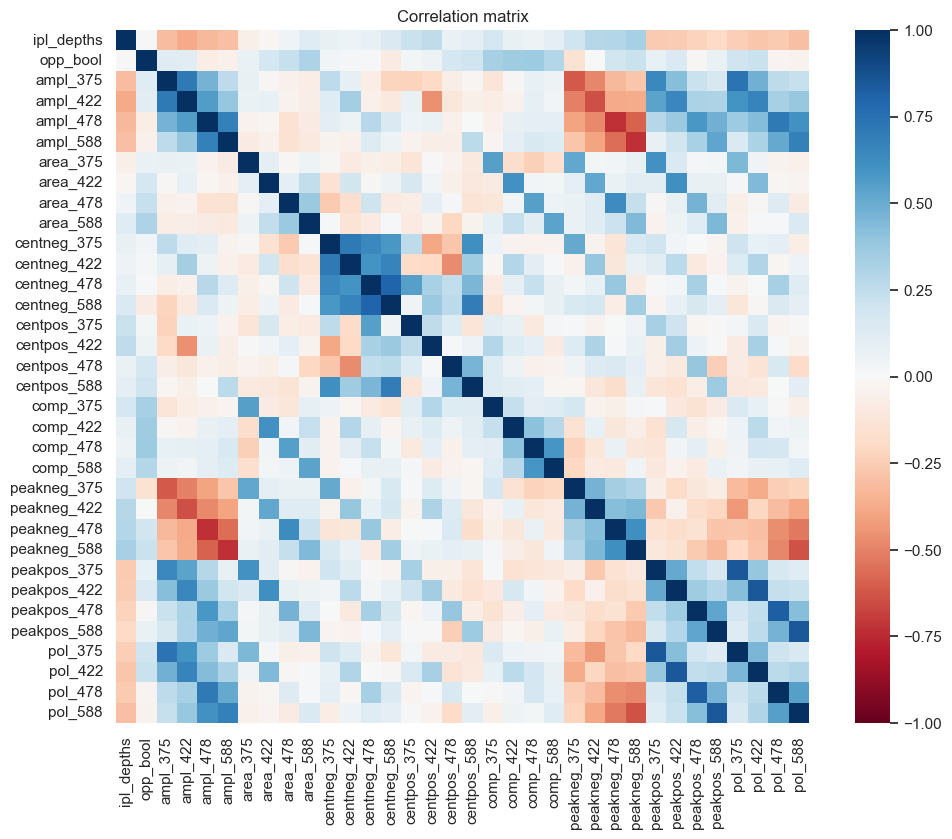

In [328]:
corrmat = load_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax = 1, vmin = -1, square=True, cmap="RdBu")
plt.title("Correlation matrix");

C:\Users\SimenLab\AppData\Local\Temp\ipykernel_22572\825839970.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = load_df.cov()


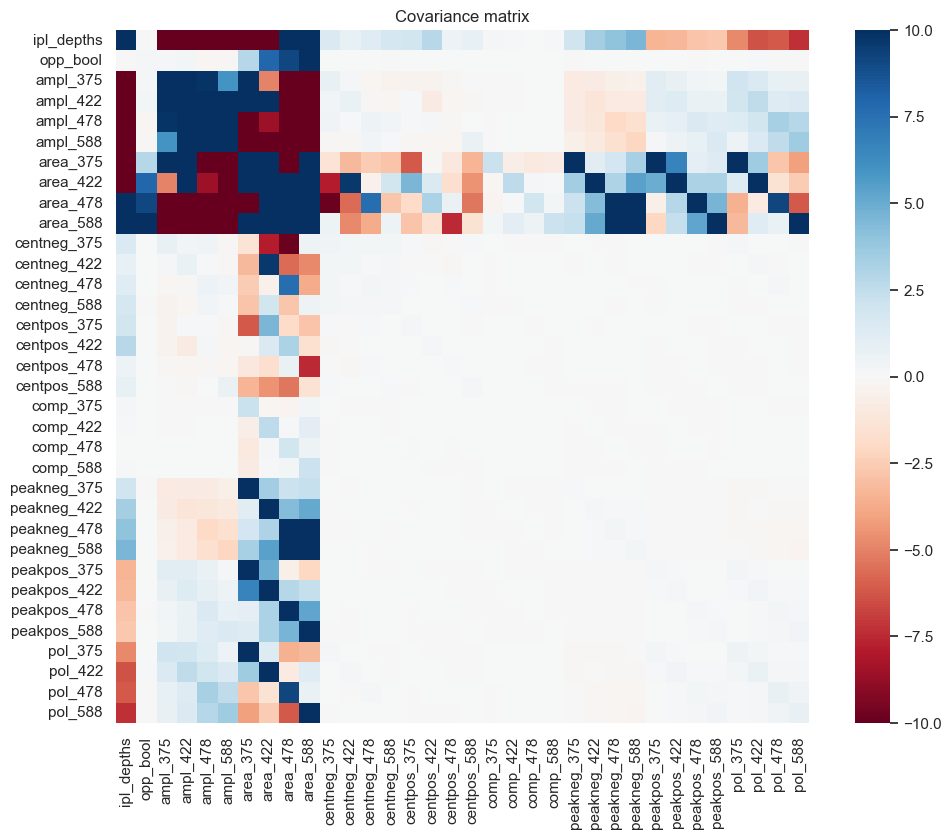

In [329]:
corrmat = load_df.cov()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmin = -10, vmax = 10, square=True, cmap="RdBu")
plt.title("Covariance matrix");

Assumptions for PCA according to paper:
1. Underlying patterns must exist and be independent of one another 
2. Must combine linearly to form observed data (linear relationship)
3. Data must contain exclusively these patterns and additive, uncorrelated noise 
4. Observations must be independent

Check and justification:
1. as


### Data exploration

[]

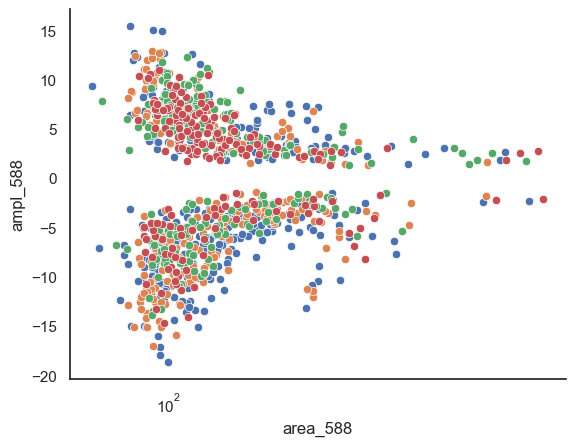

In [330]:
fig, ax = plt.subplots()
for i in ["588", "478", "422", "375"]:
    sns.scatterplot(load_df, x = f"area_{i}", y = f"ampl_{i}", ax= ax)
#ax.set_yscale("log")
ax.semilogx()

## Cluster

## Post-PCA Clustering

In [211]:
load_df = chroma_df.copy()
pruned_df = prep_input_df(load_df, scaler=None, select_cols=cols_like(["area", "ampl", "peak", "cent", "cat"], load_df))

In [212]:
pruned_df.describe()

,area_375,area_422,area_478,area_588,ampl_375,ampl_422,ampl_478,ampl_588,peakneg_375,peakneg_422,...,peakpos_478,peakpos_588,centneg_375,centneg_422,centneg_478,centneg_588,centpos_375,centpos_422,centpos_478,centpos_588
count,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,...,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000
mean,73.816841,91.725965,91.088394,114.413997,0.624330,0.718599,-1.494345,-2.292176,0.190404,0.288068,...,0.298573,0.360619,0.263966,0.367256,0.559908,0.505542,0.504322,0.550956,0.419563,0.472175
std,102.060759,96.831367,84.729092,95.044748,4.246291,5.104121,5.945711,6.433006,0.395231,0.454155,...,0.475783,0.498085,0.617087,0.631482,0.716353,0.598735,0.716627,0.702699,0.697222,0.694509
min,0.000000,0.000000,0.000000,0.000000,-14.704122,-13.890948,-16.984079,-18.643628,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,81.271000,0.000000,-1.717605,-4.864837,-6.729283,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,86.355000,99.451000,95.333500,107.949000,0.000000,0.000000,0.000000,-2.474494,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,117.022500,126.519000,131.326750,155.424750,3.073706,4.406746,0.000000,1.868899,0.000000,0.910000,...,0.975000,0.991250,0.000000,0.784294,1.049738,0.945763,1.149246,1.090282,1.051390,1.169984
max,779.198000,708.257000,573.311000,720.338000,10.990853,12.311855,12.928589,15.431286,1.235000,1.235000,...,1.235000,1.235000,3.694479,2.783590,3.234674,3.254015,2.734413,3.372530,3.460284,3.332489


Read this: https://scikit-learn.org/stable/modules/preprocessing.html 

In [158]:
output_df.describe()

,ampl_375,ampl_422,ampl_478,ampl_588,area_375,area_422,area_478,area_588,peakneg_375,peakneg_422,...,peakpos_478,peakpos_588,centneg_375,centneg_422,centneg_478,centneg_588,centpos_375,centpos_422,centpos_478,centpos_588
count,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,...,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000
mean,0.042460,0.051731,-0.087985,-0.122947,0.596554,0.557557,0.517832,0.479868,0.154173,0.233254,...,0.241760,0.291999,0.071449,0.131936,0.173096,0.155360,0.184435,0.163366,0.121251,0.141688
std,0.288782,0.367442,0.350076,0.345051,0.165258,0.194793,0.198769,0.188790,0.320025,0.367737,...,0.385249,0.403308,0.167029,0.226859,0.221461,0.183999,0.262077,0.208360,0.201493,0.208405
min,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-0.123649,-0.286435,-0.360943,0.572257,0.464582,0.405154,0.349652,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,-0.132726,0.572257,0.530132,0.567789,0.474517,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.209037,0.317239,0.000000,0.100243,0.691880,0.698311,0.567789,0.601983,0.000000,0.736842,...,0.789474,0.802632,0.000000,0.281756,0.324527,0.290645,0.420290,0.323283,0.303845,0.351084
max,0.747468,0.886322,0.761218,0.827698,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [784]:
 output_df.join(pruned_df.filter(like = "pol").reset_index(), how = "inner", validate = "one_to_one").drop("index", axis = 1)

,ampl_375,ampl_422,ampl_478,ampl_588,area_375,area_422,area_478,area_588,peakneg_375,peakneg_422,...,centneg_588,centpos_375,centpos_422,centpos_478,centpos_588,cat_pol,pol_375,pol_422,pol_478,pol_588
0,0.0,-0.226531,0.000000,-0.307263,0.0,0.385482,0.000000,0.319103,0.0,0.842105,...,0.387995,0.0,0.000000,0.000000,0.000000,other,0.0,-1.0,0.0,-1.0
1,0.0,0.000000,0.000000,-0.135996,0.0,0.000000,0.000000,0.279009,0.0,0.000000,...,0.504450,0.0,0.000000,0.000000,0.000000,other,0.0,0.0,0.0,-1.0
2,0.0,-0.181742,0.146661,0.176834,0.0,0.238864,0.391953,0.309864,0.0,0.684211,...,0.000000,0.0,0.693513,0.408497,0.408944,mix,0.0,2.0,1.0,1.0
3,0.0,0.164371,-0.102937,0.000000,0.0,0.189804,0.290516,0.000000,0.0,0.000000,...,0.000000,0.0,0.344534,0.000000,0.000000,opp,0.0,1.0,-1.0,0.0
4,0.0,0.000000,0.000000,-0.098776,0.0,0.000000,0.000000,0.293403,0.0,0.000000,...,0.369626,0.0,0.000000,0.000000,0.446425,mix,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,0.0,0.000000,0.000000,0.101137,0.0,0.000000,0.000000,0.226978,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.486895,opp,0.0,0.0,0.0,1.0
392,0.0,0.184639,0.188636,-0.209199,0.0,0.201366,0.190380,0.287286,0.0,0.000000,...,0.317431,0.0,0.544458,0.518164,0.617026,mix,0.0,1.0,1.0,2.0
393,0.0,-0.259342,-0.369005,0.000000,0.0,0.128804,0.176407,0.000000,0.0,0.789474,...,0.000000,0.0,0.000000,0.000000,0.000000,other,0.0,-1.0,-1.0,0.0
394,0.0,0.000000,0.000000,0.154046,0.0,0.000000,0.000000,0.147291,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.444615,opp,0.0,0.0,0.0,1.0


In [802]:
for i in split_df.keys():
    i
split_df[i].filter(like = "PC")

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
0,0.774915,-0.264496,0.129840,-1.296727,-1.180578,1.363738,-1.761420,-1.359816,-0.881423,-1.080291,...,-0.535062,0.166737,0.515260,0.285122,1.308138,-0.894682,-0.344866,-0.850861,-0.019180,-0.003467
1,0.342005,-0.007020,-1.486949,-0.425606,-0.712765,1.500222,-1.301584,0.800566,-1.274784,0.394661,...,-0.056489,-0.094014,-0.438569,-0.586429,-0.584400,-0.944015,0.185803,-0.473223,-1.827915,-0.556694
6,0.325898,-0.003930,-1.494504,-0.466497,-0.687261,1.282814,-1.322839,0.803132,-0.811982,0.240334,...,-0.044677,0.002603,-0.136459,-0.440525,-0.342593,-0.447413,-0.297255,-0.375105,-0.562445,-0.102222
11,0.777007,0.224084,-1.153521,1.316533,-0.567554,0.168558,0.156519,0.345906,-1.963075,0.365561,...,0.207878,-0.273797,-0.603590,0.456963,-1.382098,0.189202,-1.249094,-0.130232,-0.711917,-0.348642
19,0.317039,-0.030327,-1.504493,-0.457279,-0.692135,1.321837,-1.261030,0.765923,-0.793787,0.304365,...,-0.136218,0.170866,-0.041944,-1.280857,-0.342991,-0.541267,0.989157,-0.943457,0.723470,-0.561053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,1.089315,-0.083707,0.052282,0.174733,-0.869820,-0.133836,-0.229908,-1.518470,-1.102501,-0.608094,...,-0.206485,0.038526,0.363870,-0.084304,-0.270679,-0.110332,0.039826,0.657300,0.886982,0.239525
385,0.793616,0.264814,-1.300462,0.892297,-0.519573,0.032911,0.282325,0.371589,-0.498415,0.270812,...,0.051306,0.194242,0.021961,-0.161482,1.190607,-0.481612,0.688768,0.074079,-0.585669,0.043182
388,0.721575,0.192627,-1.315161,0.792186,-0.541291,0.133568,0.177824,0.381103,-0.842318,0.369785,...,0.095149,0.379957,-0.182414,-0.412828,1.183996,-0.587676,1.407986,-0.154787,-0.480822,-0.209616
390,1.287468,-0.108893,0.174711,0.239735,-0.791442,-0.061929,-0.262986,-1.874597,-0.932423,0.017600,...,-0.209460,-0.322132,-0.044878,-0.298787,-0.381469,0.458757,-0.183639,0.682198,0.024970,-0.087778


Automatic number determined as AIC = -1830.341739152629 landing on  full with  7 n_components
Automatic number determined as AIC = -3346.1615866367165 landing on  full with  6 n_components
Automatic number determined as AIC = -4076.602722719418 landing on  full with  5 n_components
Automatic number determined as AIC = -7980.92979084219 landing on  full with  7 n_components
Automatic number determined as AIC = -9814.589929799364 landing on  full with  5 n_components


,index,date,path,curr_path,filename,curr_path,strf_keys,cell_id,size,ipl_depths,...,peakneg_588,peakpos_375,peakpos_422,peakpos_478,peakpos_588,pol_375,pol_422,pol_478,pol_588,cluster
0,0,2023-11-07,D:\Igor analyses\231107 rfs here\2023-11-7_0_0...,C:\Users\SimenLab\OneDrive\Universitet\PhD\Pic...,2023-11-7_0_0_ColourSWN_200.h5,C:\Users\SimenLab\OneDrive\Universitet\PhD\Pic...,STRF0_0,11-07-2023_STRF0_0,200,88.0,...,1.105,0.0,0.000,0.00,0.000,0.0,-1.0,0.0,-1.0,27
1,3,2023-11-07,D:\Igor analyses\231107 rfs here\2023-11-7_0_0...,C:\Users\SimenLab\OneDrive\Universitet\PhD\Pic...,2023-11-7_0_0_ColourSWN_200.h5,C:\Users\SimenLab\OneDrive\Universitet\PhD\Pic...,STRF0_3,11-07-2023_STRF0_3,200,90.0,...,1.105,0.0,0.000,0.00,0.000,0.0,0.0,0.0,-1.0,27
2,4,2023-11-07,D:\Igor analyses\231107 rfs here\2023-11-7_0_0...,C:\Users\SimenLab\OneDrive\Universitet\PhD\Pic...,2023-11-7_0_0_ColourSWN_200.h5,C:\Users\SimenLab\OneDrive\Universitet\PhD\Pic...,STRF0_4,11-07-2023_STRF0_4,200,26.0,...,0.000,0.0,1.170,1.04,1.040,0.0,2.0,1.0,1.0,4
3,5,2023-11-07,D:\Igor analyses\231107 rfs here\2023-11-7_0_0...,C:\Users\SimenLab\OneDrive\Universitet\PhD\Pic...,2023-11-7_0_0_ColourSWN_200.h5,C:\Users\SimenLab\OneDrive\Universitet\PhD\Pic...,STRF0_5,11-07-2023_STRF0_5,200,77.0,...,0.000,0.0,0.975,0.00,0.000,0.0,1.0,-1.0,0.0,22
4,6,2023-11-07,D:\Igor analyses\231107 rfs here\2023-11-7_0_0...,C:\Users\SimenLab\OneDrive\Universitet\PhD\Pic...,2023-11-7_0_0_ColourSWN_200.h5,C:\Users\SimenLab\OneDrive\Universitet\PhD\Pic...,STRF0_6,11-07-2023_STRF0_6,200,44.0,...,0.390,0.0,0.000,0.00,1.105,0.0,0.0,0.0,2.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,474,2023-08-02,D:\Igor analyses\230802\0_1_ColourSWN_1H\2023-...,C:\Users\SimenLab\OneDrive\Universitet\PhD\Pic...,2023-8-2_'0_1_ColourSWN_200_1H'.h5,C:\Users\SimenLab\OneDrive\Universitet\PhD\Pic...,STRF0_18,08-02-2023_STRF0_18,200,14.0,...,0.000,0.0,0.000,0.00,0.910,0.0,0.0,0.0,1.0,23
392,475,2023-08-02,D:\Igor analyses\230802\0_1_ColourSWN_1H\2023-...,C:\Users\SimenLab\OneDrive\Universitet\PhD\Pic...,2023-8-2_'0_1_ColourSWN_200_1H'.h5,C:\Users\SimenLab\OneDrive\Universitet\PhD\Pic...,STRF0_19,08-02-2023_STRF0_19,200,30.0,...,0.715,0.0,0.975,1.04,1.105,0.0,1.0,1.0,2.0,3
393,476,2023-08-02,D:\Igor analyses\230802\0_1_ColourSWN_1H\2023-...,C:\Users\SimenLab\OneDrive\Universitet\PhD\Pic...,2023-8-2_'0_1_ColourSWN_200_1H'.h5,C:\Users\SimenLab\OneDrive\Universitet\PhD\Pic...,STRF0_20,08-02-2023_STRF0_20,200,83.0,...,0.000,0.0,0.000,0.00,0.000,0.0,-1.0,-1.0,0.0,25
394,477,2023-08-02,D:\Igor analyses\230802\0_1_ColourSWN_1H\2023-...,C:\Users\SimenLab\OneDrive\Universitet\PhD\Pic...,2023-8-2_'0_1_ColourSWN_200_1H'.h5,C:\Users\SimenLab\OneDrive\Universitet\PhD\Pic...,STRF0_21,08-02-2023_STRF0_21,200,61.0,...,0.000,0.0,0.000,0.00,0.975,0.0,0.0,0.0,1.0,23


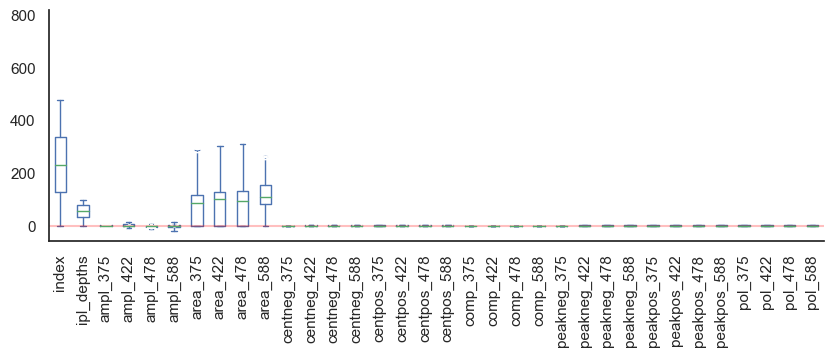

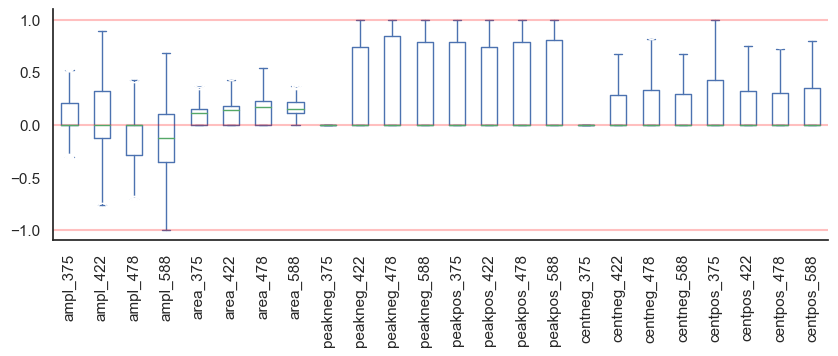

In [526]:
clustering_params = ["ampl", "area", "peak", "cent"]
# def clust_pipeline(input_df, n_clust = 5, cluster_params = clustering_params):
#     """
#     Applies a clustering pipeline to input data.

#     Parameters:
#     - input_df (pd.DataFrame): Input data to be processed and clustered.
#     - n_clust (int, optional): Number of clusters to create. Default is 5.
#     - cluster_params (dict, optional): Additional parameters for clustering. Default is clustering_params.

#     Returns:
#     pd.DataFrame: Processed data with clusters applied.

#     Note:
#     - Ensure that the input data is preprocessed and cleaned before using this pipeline.
#     - The function performs Principal Component Analysis (PCA) on the input data, then applies Agglomerative Hierarchical Clustering on the resulting PCA components.
#     - The clusters are then applied to a copy of the input data, and the modified data is returned.
#     """
#     # Run PCA
#     _pca, _df_pca = df_pca(input_df, whiten=True)
#     _df_pca = _df_pca.dropna(axis = 1)
#     # Run clustering on PCA result
#     _df_clust = df_AggHierarchy(_df_pca, n_clust)
#     # Apply output by writing clusters to input data
#     df_output = apply_clusters(input_df.copy(), _df_clust)
    # return df_output
def clust_pipeline(input_df, cluster_params = clustering_params, *args):
    # Run clustering on PCA result
    _df_clust = df_GMM(input_df)
    # Apply output by writing clusters to input data
    df_output = apply_clusters(input_df.copy(), _df_clust)
    return df_output

## Step 0: Remove all-zero enteries from data
pruned_df = prep_input_df(load_df, scaler = None).reset_index()
## Step 1: Scale data
# Initialise transfomers 
standard_maxabs_transformer  = Pipeline(steps=[("maxabs", MaxAbsScaler())])
standard_minmax_transformer  = Pipeline(steps=[("minmax", MinMaxScaler())])
sparse_transformer  = Pipeline(steps=[('maxsabs', MaxAbsScaler()),])
# Initialise preprocessor job
"NB! Here the order is VERY IMPORTANT! --> Need to automate"
preprocessor = ColumnTransformer(
        remainder='drop', #passthough features not listed
        transformers=[
            ('ampl',   standard_maxabs_transformer, cols_like(["ampl"], pruned_df)),
            ('area', standard_minmax_transformer , cols_like(["area"], pruned_df)),
            ("peak, cent", sparse_transformer, cols_like(["peak", "cent"], pruned_df)),
        ])

# Fit transform and write result to DataFrame 
output_df = pd.DataFrame(preprocessor.fit_transform(pruned_df.copy()), columns=cols_like(clustering_params, load_df))
# output_df = pruned_df[]
# Check that we are happy with outcome
pruned_df.plot(kind = "box", figsize = (10, 3))
# plt.ylim(-15, 15)
plt.axhline(0, c = "red", alpha = 0.25)
plt.xticks(rotation=90);
output_df.plot(kind = "box", figsize = (10, 3))
for j in [0, -1, 1]:
    plt.axhline(j, c = "red", alpha = 0.25)
plt.xticks(rotation=90);
## Step 1: Apply PCA
output_pca, output_df_pca = df_pca(output_df, whiten=True)
## Step 2: Split the data into groups depending on cat_pol (can be optional step)
# Add cat_pol and wavelength pol back into output for filtering (reset_index is crucial here for correct merging of indeces)
output_df_pca = output_df_pca.join(pruned_df.filter(like = "pol").reset_index(), how = "inner", validate = "one_to_one").drop("index", axis = 1)
split_df = filehandling.split_df_by(output_df_pca, "cat_pol")

# ## Step 3: Apply clustering to each split
split_df_clust = {i : clust_pipeline(split_df[i].filter(like = "PC")) for i in split_df.keys()}
## Ste 3.5: Rename cluster IDs to prep for merging
for i in split_df_clust.keys():
    if split_df_clust[i]["cluster_id"].dtype != "object":
        split_df_clust[i]["cluster_id"] = f'{i}' + '_' + split_df_clust[i]["cluster_id"].astype(str)
# Step 4: Merge results
merged_output_df = pd.concat(split_df_clust[i] for i in split_df_clust.keys())
merged_output_df["cluster_id"] = merged_output_df["cluster_id"].astype('category')
merged_output_df["cluster"] = merged_output_df.cluster_id.cat.codes
output_df["cluster"] = merged_output_df["cluster"]
merged_output_df["ipl_depths"] = pruned_df["ipl_depths"]
output_df["ipl_depths"] = pruned_df["ipl_depths"]
pruned_df = pruned_df.join(merged_output_df["cluster"])
pruned_df["ipl_depths"] = pruned_df["ipl_depths"]
pruned_df


In [21]:
pruned_df.filter(regex = "ampl|area|cluster")

,ampl_375,ampl_422,ampl_478,ampl_588,area_375,area_422,area_478,area_588,cluster
0,0.0,-3.146731,0.000000,-5.728493,0.0,273.020,0.000,229.862,31.0
3,0.0,0.000000,0.000000,-2.535450,0.0,0.000,0.000,200.981,17.0
4,0.0,-2.524566,2.490904,3.296836,0.0,169.177,224.711,223.207,3.0
5,0.0,2.283270,-1.748282,0.000000,0.0,134.430,166.556,0.000,5.0
6,0.0,0.000000,0.000000,-1.841545,0.0,0.000,0.000,211.349,30.0
...,...,...,...,...,...,...,...,...,...
474,0.0,0.000000,0.000000,1.885557,0.0,0.000,0.000,163.501,NaN
475,0.0,2.564809,3.203802,-3.900229,0.0,142.619,109.147,206.943,NaN
476,0.0,-3.602501,-6.267203,0.000000,0.0,91.226,101.136,0.000,NaN
477,0.0,0.000000,0.000000,2.871972,0.0,0.000,0.000,106.099,NaN


In [521]:
clustering.display_factorial_planes(merged_output_df.to_numpy(), output_pca, [(1,2)], labels = merged_output_df["cluster"], 
    illustrative_var = merged_output_df["cluster"], alpha = 1,  cmap = "rainbow")
clustering.display_circles(merged_output_df.filter(like = "PC").to_numpy(), len(pd.unique(merged_output_df["cluster"])), output_pca, [(0, 1)], labels = merged_output_df["cluster"], lims = [-2,2,-2,2])
# plot_df_tuning(pruned_df_nonscale, pruned_df_bGMM, [0, 1])

NameError: name 'merged_output_df' is not defined

In [34]:
merged_output_df

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC17,PC18,PC19,PC20,PC21,PC22,PC23,cluster_id,cluster,ipl_depths
2,-0.781474,-1.411397,2.172755,-0.084278,-1.307863,0.059052,-0.052952,-0.602845,0.987938,1.520326,...,-0.488441,-2.325519,0.188834,0.418421,0.814115,-0.082449,-0.078976,mix_5,5,26.0
4,-0.218766,-1.092470,-1.310028,-0.444240,-0.162575,1.661153,0.672067,-0.330944,0.650469,-0.111209,...,0.529504,-0.685141,-0.792123,0.169306,0.115534,-3.344086,-0.400757,mix_3,3,44.0
5,-0.502160,-1.184423,1.842140,1.074122,-1.035026,-0.737146,0.974074,-0.722668,0.693397,-0.844341,...,-1.498333,-1.752515,1.982845,-0.914524,-1.276343,1.144627,1.614707,mix_5,5,24.0
7,0.872169,0.598743,0.992136,0.605140,-1.709463,0.174479,0.678487,-0.043962,-1.282196,1.398224,...,0.358778,0.676288,-0.195822,-0.558426,-1.069054,0.319581,-0.118827,mix_4,4,89.0
8,0.252124,-0.958806,-0.108116,3.137063,0.152384,0.624082,0.712203,-0.540321,-0.084639,-0.058401,...,-1.518877,-0.356484,-0.195364,-1.831586,-0.569096,0.816464,0.506721,mix_1,1,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,1.089315,-0.083707,0.052282,0.174733,-0.869820,-0.133836,-0.229908,-1.518470,-1.102501,-0.608094,...,-0.084304,-0.270679,-0.110332,0.039826,0.657300,0.886982,0.239525,other_3,29,78.0
385,0.793616,0.264814,-1.300462,0.892297,-0.519573,0.032911,0.282325,0.371589,-0.498415,0.270812,...,-0.161482,1.190607,-0.481612,0.688768,0.074079,-0.585669,0.043182,other_1,27,82.0
388,0.721575,0.192627,-1.315161,0.792186,-0.541291,0.133568,0.177824,0.381103,-0.842318,0.369785,...,-0.412828,1.183996,-0.587676,1.407986,-0.154787,-0.480822,-0.209616,other_1,27,79.0
390,1.287468,-0.108893,0.174711,0.239735,-0.791442,-0.061929,-0.262986,-1.874597,-0.932423,0.017600,...,-0.298787,-0.381469,0.458757,-0.183639,0.682198,0.024970,-0.087778,other_3,29,92.0


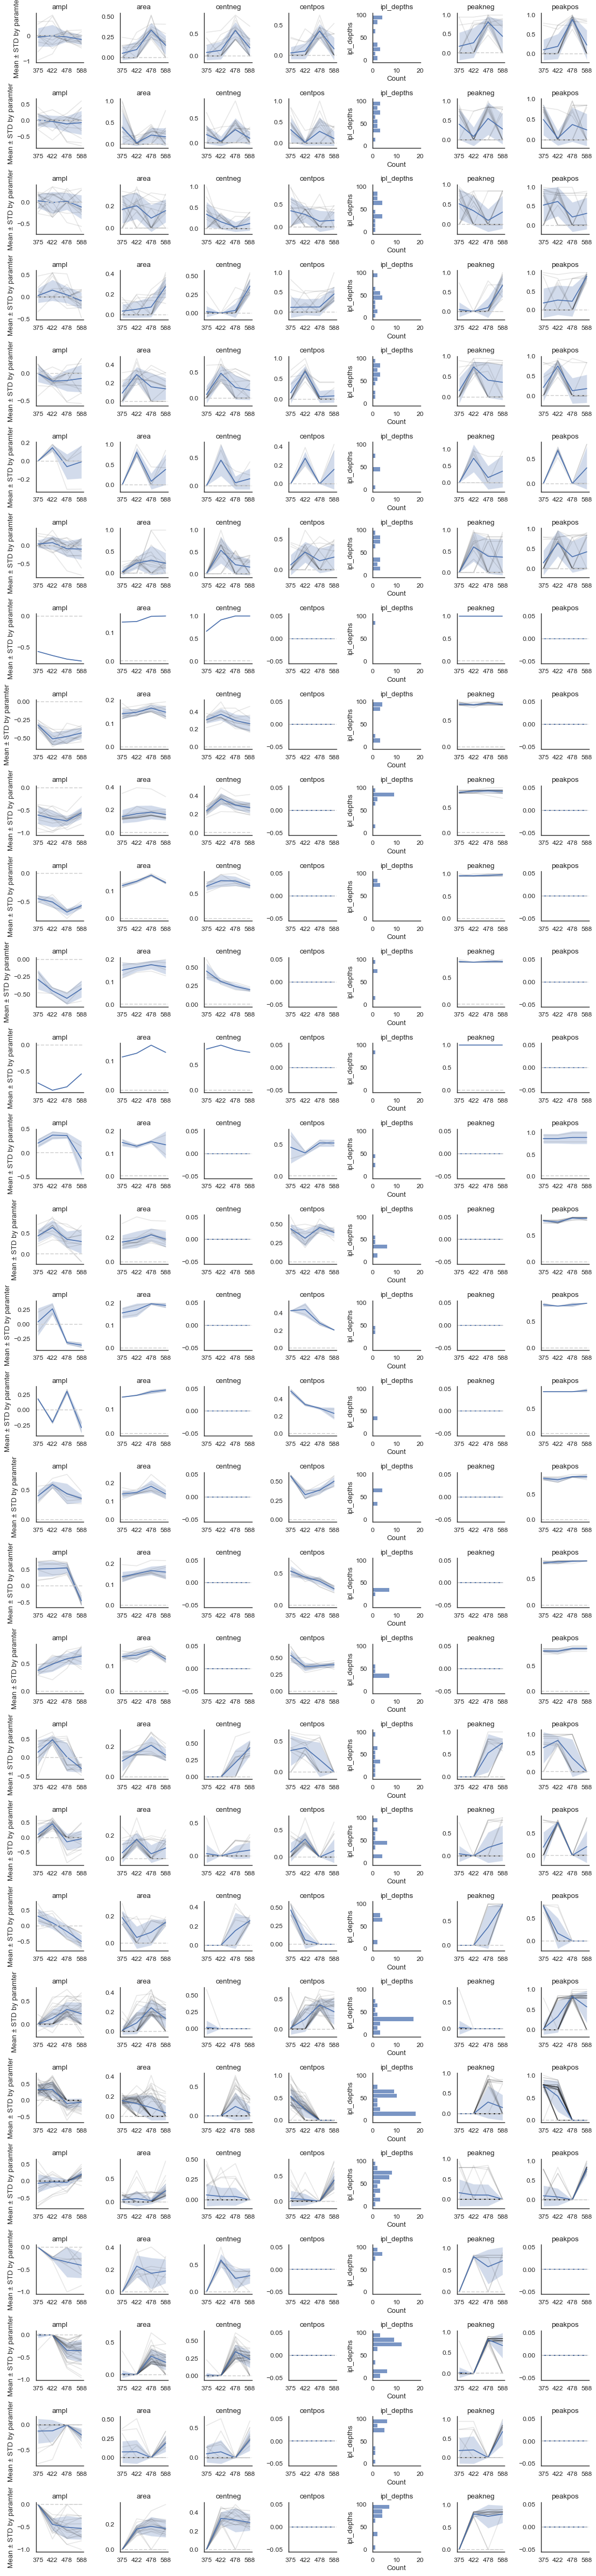

In [51]:
# # Vizualize n clusters
n_clust = len(pd.unique(merged_output_df["cluster"]))
num_stats = 7
# pruned_df.filter(regex = "ampl|area|cluster")
fig, ax = plt.subplots(n_clust, num_stats, figsize = (num_stats*2, n_clust*2), dpi = 80)
for n, i in enumerate(range(n_clust)):
    plot_df_tuning(output_df.filter(regex = "ampl|area|cent|peak|cluster|ipl"), i, ax = ax[n, 0:num_stats])
fig.tight_layout()

In [826]:
# ## Prepare data by cleaning and scaling, plus non scaled version of cleaned DF
# cluster_params = ["amp", "area", "peak", "cent"]
# # pruned_df[cols_like(["ampl"], pruned_df)]= sum_div_norm(pruned_df[cols_like(["ampl"], pruned_df)].values)
# pruned_df = prep_input_df(load_df, cluster_params, scaler = StandardScaler())
# ## Scale amplitude differentally
# # pruned_df[cols_like(["amp"], pruned_df)] = scale_data_points(pruned_df[cols_like(["amp"], pruned_df)])
# # Run PCA
# pruned_pca, pruned_df_pca = df_pca(pruned_df, whiten=True)
# # Run clustering on PCA result
# n_clust = 25
# pruned_df_clust = df_AggHierarchy(pruned_df_pca, n_clust)
# # Apply output by writing clusters to input data
# df_output = apply_clusters(pruned_df, pruned_df_clust)

## Create DF for visualising clustering results on original data
# stats_params =  ["ipl_depths"]
# stats_params.extend(clustering_params)
# stats_df = filehandling.split_df_by(load_df, "cat_pol")["off"]
# stats_df = prep_input_df(stats_df, stats_params, scaler = StandardScaler(), ignore_scale=cols_like([i for i in stats_params if i not in clustering_params], load_df))
# visualise_clust_df = apply_clusters(stats_df, merged_output_df)

# df_output["ipl_depths"] = visualise_clust_df["ipl_depths"].values


# plt.show()
# sns.boxplot(output_df, x = "cluster_id", y = "ipl_depths")
# plt.title("Distribution of cell IPL depth by cluster")
# # PCA for visualisation
clustering.display_factorial_planes(output_df.to_numpy(), pruned_pca, [(0,1)], labels = output_df["cluster_id"], 
    illustrative_var = output_df["cluster_id"], alpha = 1,  cmap = "rainbow")
# clustering.display_circles(pruned_df_pca.to_numpy(), 25, pruned_pca, [(0, 1)], labels = pruned_df_clust["cluster_id"], lims = [-2,2,-2,2])
# plot_df_tuning(pruned_df_nonscale, pruned_df_bGMM, [0, 1])

KeyError: 'cluster_id'

## TODO:
- [ ] Figure out how to scale metrics independently, such that scaling is based in more "real" metrics (e.g., area cannot be negative). Don't worry too much about the spread in data/range, because the PCA step will take care of this and scale down to a comparative feature space
- [x] Create a metric for chromatic opponency such that equals: 'ON', 'OFF' or 'Mixed' depending on  (and 'Opponent?') tuning function
- [x] Then split data depending on this, such that you have a number of DFs equal to the number of above metric categories
- [ ] Run PCA on data seperately, and combine cluster ID's into the original Dataframe such that cluster IDs are formatted:
    - ON_0, ON_1, etc... or Mixed_0, Mixed_1, etc...
    - Note: This means that there can be no ambigouity in the data! No cell must ever be in two groups, as this would break assigning of cluster_ID (at least in any sensible way)
- [ ] Implement a "delay" metric rather than peaktime, as this is more meaningful 





^ Skrewing around with the clustering still. What I want to do is use MaxAbsScaler for some things like area but StanardScaler or otherwise for others. Need to look into sklearn pipelines, and maybe change the logic of prepping the DFs depending. 

Would be neat to be able to: 
- Give DF to cluster on 
- Give columns to use for clustering 
- Specficy columns to be scaled before clustering
- Specify how those columns are to be scaled 
- Return the entire DF after scaling and clustering with the cluster ID applied

Other notes for meeting:
- PG recordings --> Seems not bright enough, although also not very convincing with very bright Chrolis (Tess looking into this)
- Postponing PoorLabs switch until Tess tries neutral dentisty filters on Henry 
- Splitting by polarity then clustering --> Do I combine the PCAs first, or cluster everything seperate and just add together the cluster IDs?
- Can I apply scaling and transformations differently? 

In [ ]:
load_df["opp_bool"]

0      False
1       True
2       True
3      False
4       True
       ...  
476    False
477    False
478     True
479    False
480     True
Name: opp_bool, Length: 481, dtype: bool

In [ ]:
df_output

,ampl_375,ampl_422,ampl_478,ampl_588,area_375,area_422,area_478,area_588,peakneg_375,peakneg_422,peakneg_478,peakneg_588,peakpos_375,peakpos_422,peakpos_478,peakpos_588,cluster_id
0,0.0,-0.226531,0.000000,-0.307263,0.0,0.385482,0.000000,0.319103,0.0,0.842105,0.000000,0.894737,0.0,0.000000,0.000000,0.000000,9
1,0.0,0.000000,0.000000,-0.135996,0.0,0.000000,0.000000,0.279009,0.0,0.000000,0.000000,0.894737,0.0,0.000000,0.000000,0.000000,20
2,0.0,-0.181742,0.146661,0.176834,0.0,0.238864,0.391953,0.309864,0.0,0.684211,0.000000,0.000000,0.0,0.947368,0.842105,0.842105,4
3,0.0,0.164371,-0.102937,0.000000,0.0,0.189804,0.290516,0.000000,0.0,0.000000,0.842105,0.000000,0.0,0.789474,0.000000,0.000000,5
4,0.0,0.000000,0.000000,-0.098776,0.0,0.000000,0.000000,0.293403,0.0,0.000000,0.000000,0.315789,0.0,0.000000,0.000000,0.894737,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,0.0,-0.430485,-0.343558,-0.300678,0.0,0.172560,0.234815,0.208112,0.0,0.842105,0.842105,0.842105,0.0,0.000000,0.000000,0.000000,23
390,0.0,0.184639,0.188636,-0.209199,0.0,0.201366,0.190380,0.287286,0.0,0.000000,0.000000,0.578947,0.0,0.789474,0.842105,0.894737,4
391,0.0,-0.259342,-0.369005,0.000000,0.0,0.128804,0.176407,0.000000,0.0,0.789474,0.789474,0.000000,0.0,0.000000,0.000000,0.000000,23
392,0.0,0.000000,0.000000,0.154046,0.0,0.000000,0.000000,0.147291,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.789474,21


In [ ]:
visualise_clust_df

,ipl_depths,ampl_375,ampl_422,ampl_478,ampl_588,area_375,area_422,area_478,area_588,peakneg_375,peakneg_422,peakneg_478,peakneg_588,peakpos_375,peakpos_422,peakpos_478,peakpos_588,cluster_id
0,88.0,0.572257,0.410041,0.567789,0.379022,0.0,0.385482,0.000000,0.319103,0.0,0.842105,0.000000,0.894737,0.0,0.000000,0.000000,0.000000,9
1,90.0,0.572257,0.530132,0.567789,0.472728,0.0,0.000000,0.000000,0.279009,0.0,0.000000,0.000000,0.894737,0.0,0.000000,0.000000,0.000000,20
2,26.0,0.572257,0.433785,0.651061,0.643889,0.0,0.238864,0.391953,0.309864,0.0,0.684211,0.000000,0.000000,0.0,0.947368,0.842105,0.842105,4
3,77.0,0.572257,0.617271,0.509343,0.547136,0.0,0.189804,0.290516,0.000000,0.0,0.000000,0.842105,0.000000,0.0,0.789474,0.000000,0.000000,5
4,44.0,0.572257,0.530132,0.567789,0.493092,0.0,0.000000,0.000000,0.293403,0.0,0.000000,0.000000,0.315789,0.0,0.000000,0.000000,0.894737,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,92.0,0.572257,0.301918,0.372720,0.382625,0.0,0.172560,0.234815,0.208112,0.0,0.842105,0.842105,0.842105,0.0,0.000000,0.000000,0.000000,23
390,30.0,0.572257,0.628015,0.674894,0.432676,0.0,0.201366,0.190380,0.287286,0.0,0.000000,0.000000,0.578947,0.0,0.789474,0.842105,0.894737,4
391,83.0,0.572257,0.392647,0.358272,0.547136,0.0,0.128804,0.176407,0.000000,0.0,0.789474,0.789474,0.000000,0.0,0.000000,0.000000,0.000000,23
392,61.0,0.572257,0.530132,0.567789,0.631421,0.0,0.000000,0.000000,0.147291,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.789474,21


TODO:

- Need to feature engineer a column that gives a boolean whether a cell is chromatically opponent or not